# Analysis of decentralised iterative auction server parameters

In [1]:
from __future__ import annotations

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import json

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

## Server parameters grid search

In [2]:
results_filename = '../data/dia_parameters/grid_search_t30_s6_dt07-22_12-17-27.json'

with open(results_filename) as file:
    results_data = json.load(file)

In [3]:
heuristic_results = {}
for model_results in results_data:
    for heuristic, heuristic_result in model_results.items():
        if heuristic == 'model':
            continue
        if heuristic in heuristic_results:
            heuristic_results[heuristic].append(heuristic_result)
        else:
            heuristic_results[heuristic] = [heuristic_result]
            
print(f'Number of heuristics: {len(heuristic_results)}')

Number of heuristics: 25


In [4]:
heuristic_avg_results = []
for heuristic, results in heuristic_results.items():
    heuristic_avg_results.append([
        heuristic,
        results[0]['price change'],
        results[0]['initial price'],
        [r['social welfare'] for r in results],
        [r['social welfare percent'] for r in results],
        [r['percentage tasks allocated'] for r in results],
        [r['total revenue'] for r in results],
        [r['rounds'] for r in results],
        [r['solve time'] for r in results],
        [task_price for r in results for task_price in r['task prices'].values()],
        np.mean([r['social welfare'] for r in results]),
        np.mean([r['total revenue'] for r in results]),
        np.mean([r['rounds'] for r in results]),
        np.mean([task_rounds for r in results for task_rounds in r['task rounds'].values()])
    ])
    
heuristic_df = pd.DataFrame(heuristic_avg_results, columns=[
    'name', 'price change', 'initial price', 'social welfare', 'social welfare percent', 
    'percentage tasks allocated', 'revenue', 'rounds', 'solve time', 'task prices', 
    'avg social welfare', 'avg revenue', 'avg rounds', 'avg task rounds',
])
heuristic_df = heuristic_df.sort_values(by=['price change', 'initial price'])

In [5]:
def no_colourbar(ax, df, col, title='', initial_prices=['40', '35', '30', '25', '20'], price_changes=['1', '3', '5', '7', '10']):
    ax.set_yticks(np.arange(len(price_changes)))
    ax.set_yticklabels(list(reversed(price_changes)), fontsize=11)
    ax.set_ylabel('Bid Increment', fontsize=13)
    
    ax.set_xticks(np.arange(len(initial_prices)))
    ax.set_xticklabels(list(reversed(initial_prices)), fontsize=11)
    ax.set_xlabel('Reserve Price', fontsize=13)
    
    heatmap = ax.imshow(df.pivot(index='price change', columns='initial price', values=col).sort_index(axis=0, ascending=False))
    
    ax.set_title(title, fontsize=14)
    mean_col = heuristic_df[col].mean()
    for x, initial_price in enumerate(initial_prices):
        for y, price_change in enumerate(price_changes):
            label = df[df['name'] == f'IP: {initial_price}, PC: {price_change}'].get(col).values[0]
            label_colour = 'white' if int(label) < mean_col else 'black'
            ax.text(len(initial_prices) - 1 - x, len(price_changes) - 1 - y, 
                    round(label), color=label_colour, ha='center', va='center', weight='bold', fontsize=12)

Save file location: figs/eps/decentralised_iterative_auction_server_parameters.eps
Save file location: figs/png/decentralised_iterative_auction_server_parameters.png
Save file location: figs/pdf/decentralised_iterative_auction_server_parameters.pdf


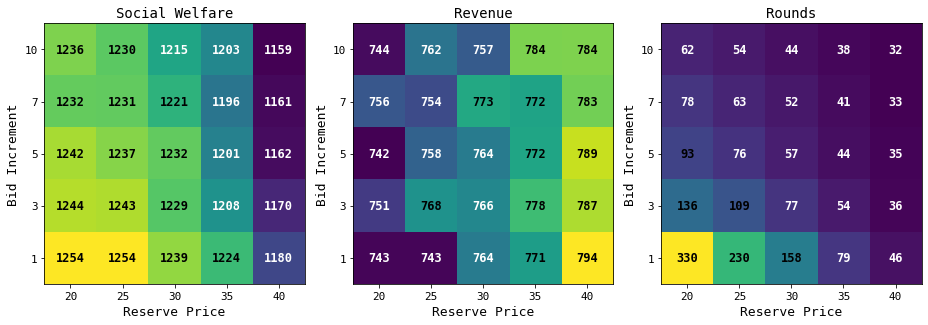

In [6]:
fig, (ax_social_welfare, ax_revenue, ax_rounds) = plt.subplots(1, 3, figsize=(13, 4.5))

no_colourbar(ax_social_welfare, heuristic_df, 'avg social welfare', 'Social Welfare')
no_colourbar(ax_revenue, heuristic_df, 'avg revenue', 'Revenue')
no_colourbar(ax_rounds, heuristic_df, 'avg rounds', 'Rounds')
plt.tight_layout()

save_plot('decentralised_iterative_auction_server_parameters')